Text(0, 0.5, 'duration')

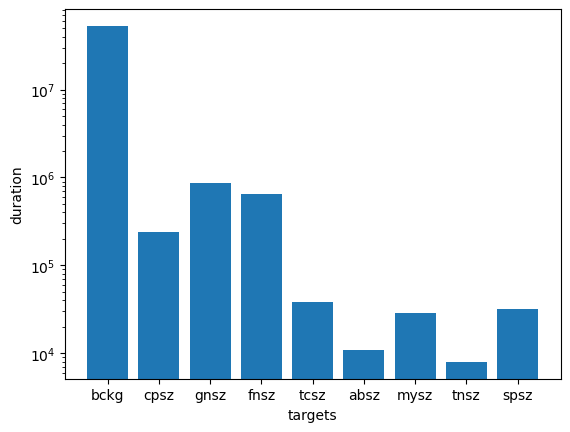

In [28]:
from collections import Counter
import glob
from matplotlib import pyplot as plt
import os
import pandas


edf_path = "..."


csv_files = glob.glob(os.path.join(edf_path, "*.csv"))
label_durations = Counter()

for file in sorted(csv_files):
    csv_data = pandas.read_csv(file, delimiter = ",", skiprows = 5)
    durations = csv_data['stop_time'].to_numpy() - csv_data['start_time'].to_numpy()
    labels = csv_data['label'].to_numpy()
    for label, duration in zip(labels, durations):
        label_durations[label] += duration

names = dict(label_durations).keys()
values = dict(label_durations).values()

plt.bar(names, values)
plt.yscale('log')
plt.xlabel('targets')
plt.ylabel('duration')